In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the dataset
print("Loading data...")
df = pd.read_csv("EVSE-B-PowerCombined.csv")
print("Data loaded successfully!")

# 2. Display the rows number
print(f"\n2. Number of rows: {len(df)}")

# 3. Display the duplicates rows number
print(f"3. Number of duplicate rows: {df.duplicated().sum()}")

# 4. Display the unique values of each categorical column
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype == 'category' or df[col].dtype == 'bool']
print("\n4. Unique values of each categorical column:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())

# 5. Drop duplicates rows
df.drop_duplicates(inplace=True)
print(f"\n5. Dropped duplicate rows. Current number of rows: {len(df)}")

# 6. Drop time, Attack, label and interface
columns_to_drop = ['time', 'Attack', 'Label', 'interface']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
print(f"\n6. Dropped columns: {', '.join(columns_to_drop)}")

# 7. Encode State
if 'State' in df.columns:
    df['State'] = df['State'].map({'idle': 0, 'charging': 1})
    print("\n7. Encoded 'State' column: {'idle': 0, 'charging': 1}")
else:
    print("\n'State' column not found.")

# 8. Encode Attack-Group
if 'Attack-Group' in df.columns:
    le_attack_group = LabelEncoder()
    df['Attack-Group'] = le_attack_group.fit_transform(df['Attack-Group'])
    print("\n8. Encoded 'Attack-Group' column using Label Encoding.")
else:
    print("\n'Attack-Group' column not found.")

# 9. Balance the data by undersampling based on Attack-Group
if 'Attack-Group' in df.columns:
    print("\n9. Balancing the data based on 'Attack-Group'...")
    attack_group_counts = df['Attack-Group'].value_counts()
    min_samples = attack_group_counts.min()
    balanced_df = df.groupby('Attack-Group').apply(lambda x: x.sample(n=min_samples, random_state=42)).reset_index(drop=True)
    print(f"Data balanced. Number of samples per 'Attack-Group': {min_samples}")
    df = balanced_df
else:
    print("\n'Attack-Group' column not found, skipping balancing.")

# 10. Define numerical columns
numerical_cols = ['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW', 'State']
numerical_cols = [col for col in numerical_cols if col in df.columns] # Ensure columns exist
print("\n10. Numerical columns:", numerical_cols)

# 11. Define features (X) and target (y)
if 'Attack-Group' in df.columns:
    X = df.drop(columns=['Attack-Group'])
    y = df['Attack-Group']
    print("\n11. Features (X) and target (y) defined.")
else:
    print("\n'Attack-Group' column not found.")

# 12. Scale numerical features
if numerical_cols and not X.empty:
    print("\n12. Scaling numerical features...")
    scaler = StandardScaler()
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
    print("Numerical features scaled successfully!")
else:
    print("\nNo numerical columns to scale or X is empty.")

# 13. Split data into training and testing, 80/20, stratified by 'Attack-Group'
if 'Attack-Group' in df.columns and not X.empty and not y.empty:
    print("\n13. Splitting data into training and testing sets (80/20) stratified by 'Attack-Group'...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    print("\nUnique values and counts of Attack-Group in training set:")
    print(y_train.value_counts().sort_index())
    print("\nUnique values and counts of Attack-Group in testing set:")
    print(y_test.value_counts().sort_index())

    # 14. Shuffle both sets to randomize the order
    X_train, y_train = shuffle(X_train, y_train, random_state=42)
    X_test, y_test = shuffle(X_test, y_test, random_state=42)
    print("\n14. Shuffled training and testing sets.")

    # 15. Display the number of training and testing samples
    print("\n15. Number of training samples:", len(X_train))
    print("Number of testing samples:", len(X_test))

else:
    print("\n'Attack-Group' column not found or X/y is empty, skipping stratified split.")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("\n15. Number of training samples:", len(X_train))
    print("Number of testing samples:", len(X_test))

# Define class labels
class_labels = le_attack_group.classes_ 


Loading data...
Data loaded successfully!

2. Number of rows: 115298
3. Number of duplicate rows: 1100

4. Unique values of each categorical column:

Column: time
['12/25/2023 22:35' '12/25/2023 22:36' '12/25/2023 22:37' ...
 '12/30/2023 11:49' '12/30/2023 11:50' '12/30/2023 11:51']

Column: State
['idle' 'charging']

Column: Attack
['syn-flood' 'tcp-flood' 'none' 'cryptojacking' 'syn-stealth' 'vuln-scan'
 'Backdoor']

Column: Attack-Group
['DoS' 'none' 'host-attack' 'recon']

Column: Label
['attack' 'benign']

Column: interface
['ocpp' 'none' 'any']

5. Dropped duplicate rows. Current number of rows: 114198

6. Dropped columns: time, Attack, Label, interface

7. Encoded 'State' column: {'idle': 0, 'charging': 1}

8. Encoded 'Attack-Group' column using Label Encoding.

9. Balancing the data based on 'Attack-Group'...
Data balanced. Number of samples per 'Attack-Group': 14300

10. Numerical columns: ['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW', 'State']

11. Features (X) 

/tmp/ipykernel_2399437/4114681596.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Attack-Group').apply(lambda x: x.sample(n=min_samples, random_state=42)).reset_index(drop=True)



Training Random Forest...
Random Forest Accuracy: 0.7034, Weighted F1 Score: 0.7022
Random Forest Classification Report:
               precision    recall  f1-score   support

         DoS       0.59      0.50      0.54      2860
 host-attack       0.79      0.76      0.77      2860
        none       0.86      0.85      0.86      2860
       recon       0.59      0.70      0.64      2860

    accuracy                           0.70     11440
   macro avg       0.71      0.70      0.70     11440
weighted avg       0.71      0.70      0.70     11440



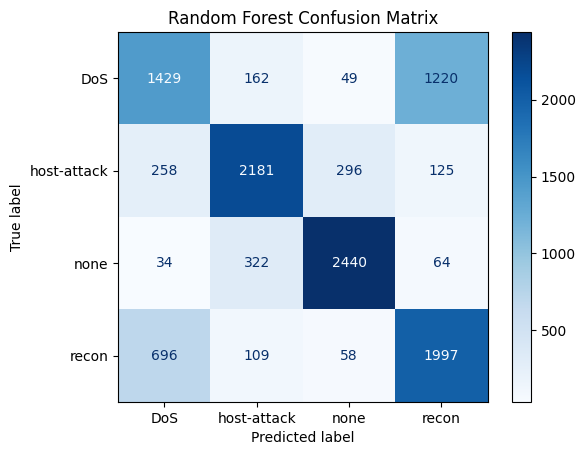


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.7173, Weighted F1 Score: 0.7005
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         DoS       0.79      0.35      0.48      2860
 host-attack       0.78      0.74      0.76      2860
        none       0.83      0.86      0.84      2860
       recon       0.59      0.92      0.72      2860

    accuracy                           0.72     11440
   macro avg       0.75      0.72      0.70     11440
weighted avg       0.75      0.72      0.70     11440



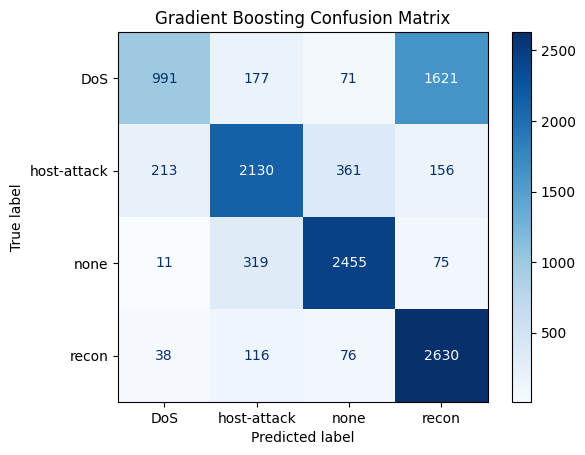


--- Plotting Machine Learning Model Comparison ---


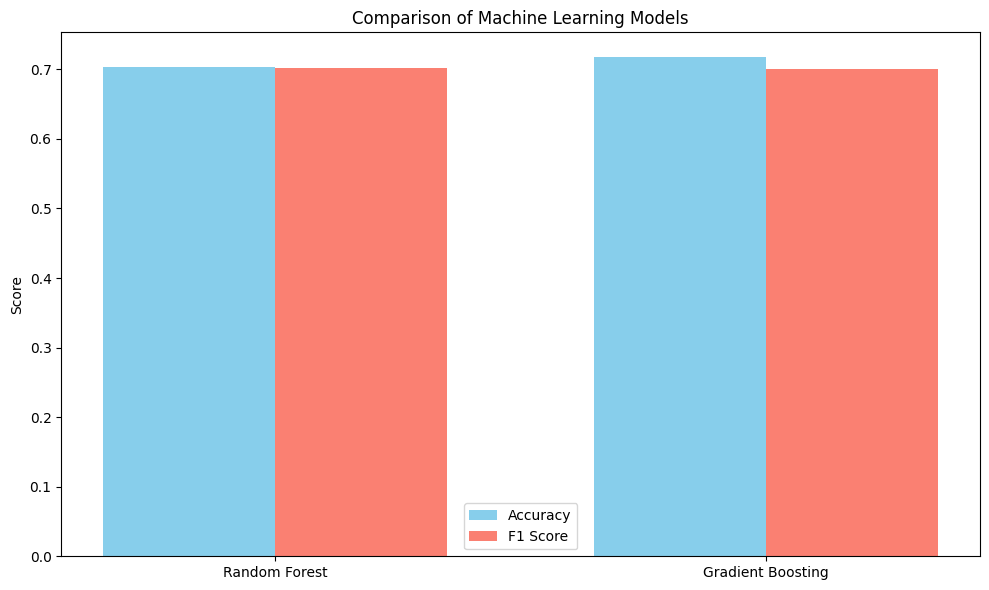

In [9]:
# Initialize the results dictionary
ml_results = {}

# 1. Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
cm_rf = confusion_matrix(y_test, y_pred_rf)
ml_results['Random Forest'] = {'Accuracy': accuracy_rf, 'F1 Score': f1_rf}
print(f"Random Forest Accuracy: {accuracy_rf:.4f}, Weighted F1 Score: {f1_rf:.4f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=class_labels))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_labels)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

# 2. Gradient Boosting
print("\nTraining Gradient Boosting...")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
cm_gb = confusion_matrix(y_test, y_pred_gb)
ml_results['Gradient Boosting'] = {'Accuracy': accuracy_gb, 'F1 Score': f1_gb}
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}, Weighted F1 Score: {f1_gb:.4f}")
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb, target_names=class_labels))
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=class_labels)
disp_gb.plot(cmap=plt.cm.Blues)
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

# --- Plotting Machine Learning Model Comparison ---
print("\n--- Plotting Machine Learning Model Comparison ---")
ml_df = pd.DataFrame.from_dict(ml_results, orient='index')
plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(len(ml_df.index))
rects1 = plt.bar(x - width/2, ml_df['Accuracy'], width, label='Accuracy', color='skyblue')
rects2 = plt.bar(x + width/2, ml_df['F1 Score'], width, label='F1 Score', color='salmon')
plt.ylabel('Score')
plt.title('Comparison of Machine Learning Models')
plt.xticks(x, ml_df.index)
plt.legend()
plt.tight_layout()
plt.show()
